# **Data Mining Project** 
# Task 1: Data Understanding and Data Preparation
Pistolesi Veronica, Poli Francesca

### Libraries

In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from collections import defaultdict
from scipy.stats import pearsonr
from matplotlib.pyplot import step, show

### Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
users = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users.csv', sep=',')

In [ ]:
tweets = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/tweets.csv', sep=',')

# Task 1.1: Data Understanding 
# **USERS**

## Data Quality (types, missing values, syntactic accuracy) and Distribution

The first step is looking at our data: we check the structure of the tables and the datatypes we're working with, then we search eventual null values so that we can detect the columns we need to keep an eye on.

In [ ]:
users.head()

,id,name,lang,bot,created_at,statuses_count
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.describe(include="all", datetime_is_numeric=True)

,id,name,lang,bot,created_at,statuses_count
count,11508.00,11507,11508,11508.00,11508,11109.00
unique,NaN,11360,26,NaN,11423,NaN
top,NaN,Sara,en,NaN,2017-06-25 15:33:05,NaN
freq,NaN,7,9970,NaN,5,NaN
mean,1274517004.83,NaN,NaN,0.53,NaN,5883.31
std,935413546.86,NaN,NaN,0.50,NaN,19073.01
min,678033.00,NaN,NaN,0.00,NaN,0.00
25%,466359391.25,NaN,NaN,0.00,NaN,41.00
50%,1128642634.00,NaN,NaN,1.00,NaN,68.00
75%,2357148067.25,NaN,NaN,1.00,NaN,2916.00


In [ ]:
users.isnull().any()

id                False
name               True
lang              False
bot               False
created_at        False
statuses_count     True
dtype: bool

After a first general look at the data and the dataset structure, we firstly decide to delete all duplicate rows in the dataset, which aren't compatible with the semantic of the dataset itself containing the users founded at the moment of data crawling.

In [ ]:
users = users.drop_duplicates()

Then, let's start the understanding and preparation related to all the attributes in the dataset.

### **'id'** attribute

Following our considerations about the attribute, we start checking the validity of the data.
The first step il looking for NaN values, which are evidently errors and thus invalid entries.

In [ ]:
print("Number of IDs with NaN value:", users['id'].isnull().sum())

Number of IDs with NaN value: 0


The Pandas function *to_numeric* transforms non numerical values in NaN when specified *errors='coerce'*, while converting the numerical values into float64 datatype.

In [ ]:
users['id'] = pd.to_numeric(users.id, errors='coerce')

In [ ]:
print("Number of IDs with NaN value:", users['id'].isnull().sum()) 

Number of IDs with NaN value: 0


Checking if the dataset contains infinity values or numbers so high to be considered infinity by Python when converted to float64.

In [ ]:
users.id.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
print("Number of IDs with NaN value:", users['id'].isnull().sum()) # transformation of inf values into NaN
# No infinite values

Number of IDs with NaN value: 0


Checking the presence of decimals or negative, decimal or duplicate numbers, which aren't compatible with the semantics of the attribute.

In [ ]:
(users.id < 0).sum() # There are no negative numbers

0

In [ ]:
(users.id %1 != 0).sum() # There are no decimal numbers 

0

In [ ]:
users.id.duplicated().sum() # There are no duplicates

0

In [ ]:
users['id']=users['id'].astype(str)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.id.describe()

count          11508
unique         11508
top       2353593986
freq               1
Name: id, dtype: object

### **'name'** attribute

Checking for NaN and unique values to have a better understanding of the attribute.

In [ ]:
users[users['name'].isnull()]

,id,name,lang,bot,created_at,statuses_count
1535,2166124159,NaN,en,0,2018-11-02 06:39:14,6566.00


In [ ]:
len(users['name'].unique()) 

11361

For this attribute, we do not care about invalid values and it is ok to have duplicates.

### **'lang'** attribute

The first step il looking for unique values in order to simplify their validity check.

In [ ]:
users['lang'].unique()

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-AU', 'da', 'ar', 'en-GB',
       'Select Language...', 'zh-TW', 'zh-cn', 'pl', 'el', 'fil', 'sv',
       'xx-lc'], dtype=object)

In [ ]:
len(users['lang'].unique())

26

Then we apply lower case to all the values and repeat the first steps.

In [ ]:
users['lang'] = users['lang'].str.lower()
users['lang'].unique()

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-au', 'da', 'ar',
       'select language...', 'zh-cn', 'pl', 'el', 'fil', 'sv', 'xx-lc'],
      dtype=object)

In [ ]:
len(users['lang'].unique())

24

Before invalid values removal/tranformation we plot a distribution of them.

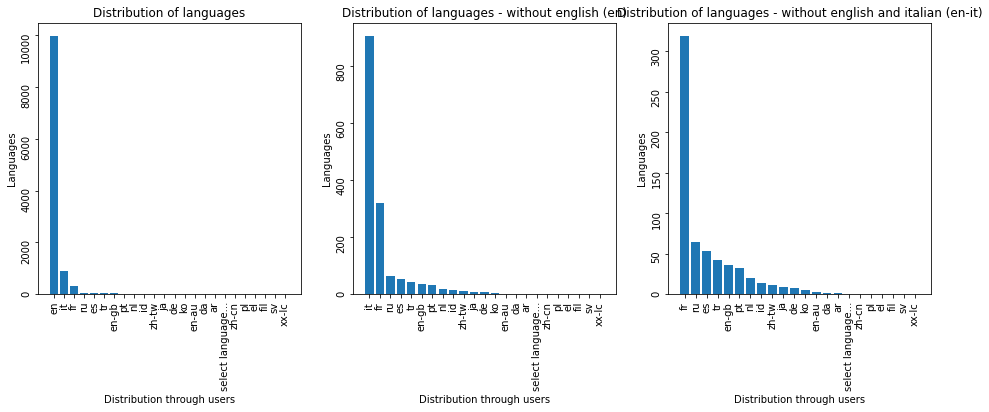

In [ ]:
f, axs = plt.subplots(ncols=3, figsize=(16,5))
axs[0].bar(users.lang.unique(),users.lang.value_counts()) #horizontal graph: barh
axs[0].tick_params(labelrotation=90) # rotation of labels
axs[0].set_title("Distribution of languages")
axs[0].set_ylabel("Languages")
axs[0].set_xlabel("Distribution through users")

axs[1].bar(users[users.lang != 'en'].lang.unique(), users[users.lang != 'en'].lang.value_counts())
axs[1].tick_params(labelrotation=90)
axs[1].set_title("Distribution of languages - without english (en)")
axs[1].set_ylabel("Languages")
axs[1].set_xlabel("Distribution through users")

axs[2].bar(users[(users.lang != "it") & (users.lang != "en")].lang.unique(), users[(users.lang != "it") & (users.lang != "en")].lang.value_counts())
axs[2].tick_params(labelrotation=90)
axs[2].set_title("Distribution of languages - without english and italian (en-it)")
axs[2].set_ylabel("Languages")
axs[2].set_xlabel("Distribution through users")

plt.show() 

'select language...', 'xx-lc' and 'fil' are not valid values. We retrieve the texts of the tweets from the 'tweets' dataset to find out which languages were actually used instead.

"select language..."

In [ ]:
users[users['lang']=="select language..."]  # 2 users with "select language..."

,id,name,lang,bot,created_at,statuses_count
4166,2956613720,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.00
8666,2904858613,Brooke,select language...,0,2019-11-22 05:44:46,85.00


In [ ]:
tweets[tweets['user_id'] == users[users['lang']=="select language..."].values[0][0]]["text"]  # first user tweets

205040      @bernardchickey I've heard of something called...
581709      RT @stephenfry: If physical diseases were trea...
726650      @Hilary_Barry Gives new meaning to the term sl...
825044                                                    NaN
871860      RT @philipreeve: Help. If you c medal tweet me...
                                  ...                        
12368319    I think even super heroes should rest at weeke...
12376829    Another one for our files @Ruckdie  https://t....
12849431    RT @laura_macd3: Cartoon Paddy in the Dom Post...
13150388        @annabf @CampbellLiveNZ @UniteUnion well done
13515351    RT @EverydaySexism: Waiting for #HillarysBigAn...
Name: text, Length: 78, dtype: object

In [ ]:
tweets[tweets['user_id'] == users[users['lang']=="select language..."].values[1][0]]["text"]  # second users tweets

51778                             @GinnyBlackmore fucking sad
471354      @NataliaKills had the right to an opinion mean...
1213993                @NataliaKills omg please be new music 
1430917     @NataliaKills @Madonna When 2 queens write a s...
1673782     On my fb newsfeed unfriending &amp; unliking a...
                                  ...                        
13251814    @NataliaKills #nataliakills please follow me q...
13286927                        @DailyDoseOfLG @NataliaKills 
13433141    RT @NataliaKills: Once a swinger, always a swi...
13496789    So fucking gutted right now when you go please...
13599241    why do boys get so absorbed in sport an people...
Name: text, Length: 106, dtype: object

"fil"

In [ ]:
users[users['lang']=="fil"]

,id,name,lang,bot,created_at,statuses_count
9389,923204785,Han✖️Nah,fil,0,2017-11-05 13:15:22,4459.00


In [ ]:
tweets[tweets['user_id'] == users[users['lang']=="fil"].values[0][0]]["text"]

3528                              @anzhxla Aram ko haha Apir 
8454                                 @KweshaMae malapit lang 
15273       RT @annecurtissmith: Watching the #VictoriasSe...
15571                                                     NaN
26893       @omgmikhaaa Di mo gets? Yung millions of led l...
                                  ...                        
13650951                                   Take me to Brazil 
13652535                        Finallyyy oh oh oh oh hahaha 
13653250                               Haynakooww asdshshasd 
13662590                                              Buhbye 
13664628    RT @Oh_Martin94: @hanna_banana25 Halaaa. Im on...
Name: text, Length: 4354, dtype: object

"xx-lc"

In [ ]:
users[users['lang']=="xx-lc"]

,id,name,lang,bot,created_at,statuses_count
10065,29552151,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.00


In [ ]:
tweets[tweets['user_id'] == users[users['lang']=="xx-lc"].values[0][0]]["text"]

6119        Spent the majority of my day drawing around, c...
12218         We all love dem cuddles. http://t.co/fPrcnUfacS
15946                    Dog sitting until 8 tonight. Again..
16947                                                     NaN
17457                 The chocolate is soooooooooooo amazing.
                                  ...                        
13633429    @Cock_Penis Around 4 hopefully...Got to go to ...
13634576         I'd love to have white hair for real though.
13637349    Is there a way to wake up without feeling like...
13640124    ...and my nails are obviously being painted bl...
13653170                Most of all, I have tattoos lined up.
Name: text, Length: 2378, dtype: object

invalid entries transformation:

In [ ]:
# Replace wrong entries with the correct one
users['lang'].replace(['select language...', 'xx-lc', 'fil'], 'en', inplace=True)

In [ ]:
users['lang'].unique() # Check new 'lang' attribute through unique values

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-au', 'da', 'ar', 'zh-cn', 'pl',
       'el', 'sv'], dtype=object)

In [ ]:
len(users['lang'].unique())

21

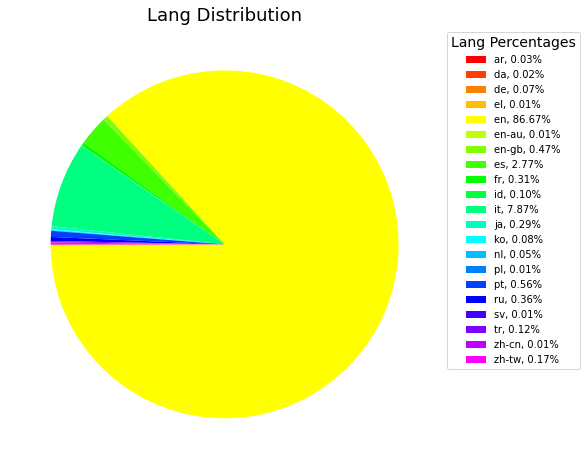

In [ ]:
Lang = users["lang"].value_counts()
Lang = Lang.sort_index(ascending = True)

plt.figure(figsize=(8,8))
colors2 = ['#ff0000', '#ff4000', '#ff8000', '#ffbf00', '#ffff00', '#bfff00', '#80ff00', '#40ff00', '#00ff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1']
#imposto lo spazio
labels_lang = Lang.index.values
#frequenza relativa: pie plot
Parch_pie=plt.pie(Lang, shadow = False, startangle = 180, colors=colors2)
plt.title("Lang Distribution", size = 18)
#calcoli per etichette e legenda
percent = 100.*Lang/Lang.sum()
labels_lang_pie = [f'{l}, {p:0.2f}%' for l, p in zip(labels_lang, percent)]
plt.legend(title = "Lang Percentages", title_fontsize = 14, bbox_to_anchor=(1, 1), labels = labels_lang_pie)

plt.show()

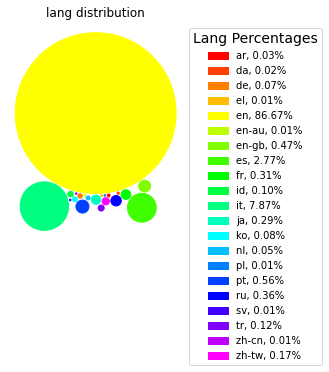

<Figure size 1152x576 with 0 Axes>

In [ ]:
Lang = users["lang"].value_counts()
#ordinati per indice crescente
Lang = Lang.sort_index(ascending = True)
#imposto lo spazio
labels_lang = Lang.index.values
#calcoli per etichette e legenda
percent = 100.*Lang/Lang.sum()
labels_lang_pie = [f'{l}, {p:0.2f}%' for l, p in zip(labels_lang, percent)]

statistics = {
    'langs': labels_lang,
    'values': percent,
    'color': ['#ff0000', '#ff4000', '#ff8000', '#ffbf00', '#ffff00', '#bfff00', '#80ff00', '#40ff00', '#00ff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1']
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
           # ax.text(*self.bubbles[i, :2], labels[i], #labels on bubbles
            #        horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=statistics['values'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, statistics['langs'], statistics['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('lang distribution')


plt.legend(title = "Lang Percentages", title_fontsize = 14, bbox_to_anchor=(1, 1), labels = labels_lang_pie)
plt.figure(figsize=(16,8))
#plt.rcParams["figure.figsize"] = [16, 8]
plt.show()

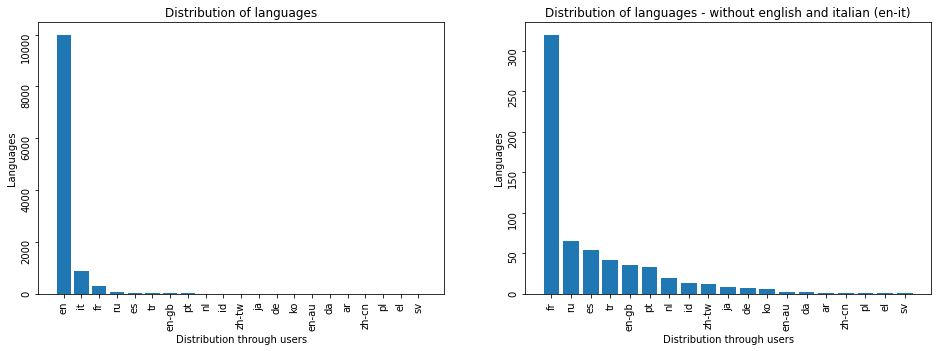

In [ ]:
f, axs = plt.subplots(ncols=2, figsize=(16,5))
axs[0].bar(users.lang.unique(),users.lang.value_counts()) #horizontal graph: barh
axs[0].tick_params(labelrotation=90) 
axs[0].set_title("Distribution of languages")
axs[0].set_ylabel("Languages")
axs[0].set_xlabel("Distribution through users")

axs[1].bar(users[(users.lang != "it") & (users.lang != "en")].lang.unique(), users[(users.lang != "it") & (users.lang != "en")].lang.value_counts())
axs[1].tick_params(labelrotation=90)
axs[1].set_title("Distribution of languages - without english and italian (en-it)")
axs[1].set_ylabel("Languages")
axs[1].set_xlabel("Distribution through users")

plt.show() 

### **'bot'** attribute

The first step il looking for unique values in order to simplify their validity check.

In [ ]:
users['bot'].unique()

array([1, 0])

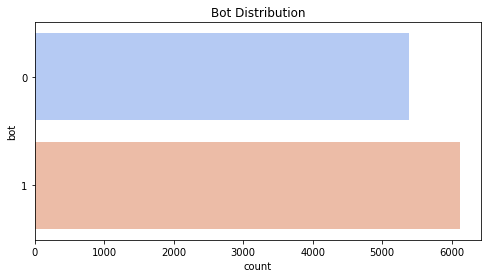

In [ ]:
# Bot Distribution
plt.figure(figsize=(8,4))
sns.countplot(y="bot", palette="coolwarm", data=users).set_title('Bot Distribution')
plt.show()

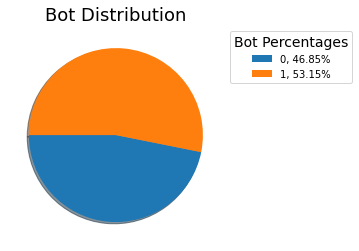

In [ ]:
Bot = users["bot"].value_counts()
Bot = Bot.sort_index(ascending = True)
plt.figure(figsize=(4,4))
labels_bot = Bot.index.values
Parch_pie=plt.pie(Bot, shadow = True, startangle = 180)
plt.title("Bot Distribution", size = 18)
percent = 100.*Bot/Bot.sum()
labels_bot_pie = [f'{l}, {p:0.2f}%' for l, p in zip(labels_bot, percent)]
plt.legend(title = "Bot Percentages", title_fontsize = 14, bbox_to_anchor=(1, 1), labels = labels_bot_pie)
plt.show()

We consider this attribute as a categorical one, so we change its datatype into string

In [ ]:
users['bot']=users['bot'].astype(str)

### **'created_at'** attribute

For this attribute we decide to first change its datatype into datetime.

In [ ]:
# Change type for date
users['created_at'] = pd.to_datetime(users.created_at, format='%Y-%m-%d %H:%M:%S')

We consider dates before the creation of Twitter and after the project delivery (assumed as data crawling date) as clear invalid values.

In [ ]:
users[users['created_at'] > '2022-09-28 00:00:00']

,id,name,lang,bot,created_at,statuses_count


In [ ]:
users[users['created_at'] < '2006-03-21 00:00:00']

,id,name,lang,bot,created_at,statuses_count


In [ ]:
print("Number of created_at with NaN value:", users['created_at'].isnull().sum())

Number of created_at with NaN value: 0


#### **In-depth analysis:** Check users with same created_at and statuses_count (Are those bots or true people?)




We check if users with the same created_at values are all bots or not

In [ ]:
duplicates_createdat = users[users.created_at.duplicated(keep=False)]
duplicates_createdat.sort_values('created_at')

,id,name,lang,bot,created_at,statuses_count
6617,466378907,Anna Loretti,it,1,2017-01-18 10:25:19,141.00
8797,466378909,Lisa,it,1,2017-01-18 10:25:19,349.00
4990,467066534,Renato Schio,it,1,2017-01-19 02:46:12,105.00
1365,467066531,Rossana,it,1,2017-01-19 02:46:12,418.00
11420,467109178,Valerio Parente,it,1,2017-01-19 03:55:09,112.00
...,...,...,...,...,...,...
4716,1273211215,Zoccholetta,it,1,2018-03-18 20:12:01,808.00
1577,2351709950,Gearldine Wallen,en,1,2019-02-21 13:42:46,67.00
5092,2351708202,Ingrid Kittler,en,0,2019-02-21 13:42:46,67.00
6499,2353500097,Breann Bettinson,en,1,2019-02-22 16:37:04,66.00


In [ ]:
duplicates_createdat['bot'].value_counts()

1    129
0     33
Name: bot, dtype: int64

In [ ]:
listUB = duplicates_createdat.groupby('created_at')['bot'].apply(list)

In [ ]:
print(len(listUB))

77


In [ ]:
for i in listUB:
  print(i)

['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1', '1', '0', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '0']
['1', '0']
['1', '1']
['1', '1']
['1', '1']
['0', '1', '1', '1']
['1', '1', '1', '0']
['0', '1']
['1', '0']
['1', '1']
['1', '1']
['1', '0']
['0', '0']
['1', '1']
['1', '1']
['1', '1']
['0', '1']
['0', '0', '1']
['0', '1']
['0', '1']
['0', '1']
['1', '1']
['1', '1']
['1', '0']
['0', '1']
['0', '1']
['1', '1']
['1', '0']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '0']
['1', '0']
['1', '0']
['1', '1']
['1', '1']
['0', '0']
['1', '0']
['1', '0']
['0', '0']
['0', '1']
['1', '0']
['1', '1']
['1', '1']
['1', '1']
['0', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '1']
['1', '0']
['1', '1']


*    [1, 1] --> 48 times (2 bots created at the same time)

*    [1, 0] or [0, 1] --> 22 times (1 user and 1 bot created at the same time)

*    [0, 0] --> 3 times (2 users created at the same time)
*    [1, 1, 1, 0, 1] --> 1 time (1 user and 4 bots created at the same time)
*    [0, 1, 1, 1] or [1, 1, 1, 0] --> 2 times (1 user and 3 bots created at the same time)
*    [0, 0, 1] --> 1 time (2 users and 1 bot created at the same time)

In [ ]:
# listUB.value_counts()  # unhashable type: 'list'

We check if users with the same created_at and statuses_count values are all bots or not

In [ ]:
dup_createdat_statusescount = duplicates_createdat[duplicates_createdat.duplicated(subset=['created_at','statuses_count'], keep=False)]
dup_createdat_statusescount.sort_values('statuses_count')

,id,name,lang,bot,created_at,statuses_count
6468,1176169747,Gabriela Rosner,en,1,2018-02-15 17:12:23,15.00
6565,1176150378,Amiee Dole,en,1,2018-02-15 17:12:23,15.00
4831,616302333,Tristan Yang,en,0,2017-06-25 15:49:49,44.00
11056,616225699,Lolita Slater,en,1,2017-06-25 15:49:49,44.00
1604,616299405,Bambi Tate,en,0,2017-06-25 15:46:43,55.00
10631,616299231,Micaela Ward,en,1,2017-06-25 15:46:43,55.00
3120,616210993,Corie Watts,en,1,2017-06-25 15:33:05,56.00
9755,616206269,Janina Castro,en,0,2017-06-25 15:33:05,56.00
10215,616218488,Lashell Albert,en,1,2017-06-25 15:47:17,60.00
10802,616218482,Luci Sims,en,1,2017-06-25 15:47:17,60.00


In [ ]:
dup_createdat_statusescount['bot'].value_counts()

1    10
0     4
Name: bot, dtype: int64

In [ ]:
listUB2 = dup_createdat_statusescount.groupby('statuses_count')['bot'].apply(list)

In [ ]:
for i in listUB2:
  print(i)

['1', '1']
['0', '1']
['0', '1']
['1', '0']
['1', '1']
['1', '1']
['1', '0']


*    [1, 1] --> 3 times (2 bots created at the same time and with the same statuses_count value)
*    [0, 1] or [1, 0] --> 4 times (1 user and 1 bot created at the same time and with the same statuses_count value)

In [ ]:
#listUB2.value_counts()  # unhashable type: 'list'



### **'statuses_count' attribute**

* check valid values for statuses_count column (NaN or different from integers not allowed) 
* change statuses_count to int

In [ ]:
print("Number of statuses_count with NaN value:", users['statuses_count'].isnull().sum())

Number of statuses_count with NaN value: 399


In this case to_numeric() transforms all the values (except for NaN) into numbers.

In [ ]:
users['statuses_count'] = pd.to_numeric(users.statuses_count, errors='coerce')

In [ ]:
print("Number of statuses_count with NaN value:", users['statuses_count'].isnull().sum()) 

Number of statuses_count with NaN value: 399


In [ ]:
users.statuses_count.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
print("Number of statuses_count with NaN value:", users['statuses_count'].isnull().sum())  # no inf values were found

Number of statuses_count with NaN value: 399


Check for negative or decimal numbers

In [ ]:
(users.statuses_count < 0).sum() # There are no negative numbers

0

In [ ]:
(users.statuses_count %1 != 0).sum() # There are no decimal numbers

399

In [ ]:
np.min(users.statuses_count)

0.0

In [ ]:
np.max(users.statuses_count)

399555.0

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.statuses_count.describe() 

count    11109.00
mean      5883.31
std      19073.01
min          0.00
25%         41.00
50%         68.00
75%       2916.00
max     399555.00
Name: statuses_count, dtype: float64

In [ ]:
print('statuses_count Mean:', round(np.mean(users.statuses_count),2), 'statuses_count')

statuses_count Mean: 5883.31 statuses_count


In [ ]:
print('statuses_count Standard Deviation:',round(np.std(users.statuses_count),2), 'statuses_count')

statuses_count Standard Deviation: 19072.15 statuses_count


In [ ]:
median= np.nanmedian(users.statuses_count)
print('statuses_count Median:', round(median,2))

statuses_count Median: 68.0


In [ ]:
stats.median_abs_deviation(users.statuses_count, nan_policy='omit')

49.0

In [ ]:
stats.mode(users.statuses_count, nan_policy='omit') 

ModeResult(mode=array([43.]), count=array([180.]))

In [ ]:
mode= stats.mode(users.statuses_count, nan_policy='omit')[0][0]
print("statuses_count Mode:", mode)

statuses_count Mode: 43.0


* Boxplot and outliers' analysis

In [ ]:
# Check the number of outliers
Q1, Q3= users.statuses_count.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in users.statuses_count:
  if x > max or x < min: 
    outliers = outliers+1
    
percentage = round((outliers*100)/users.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 2080
Percentage of outliers 18.07 %


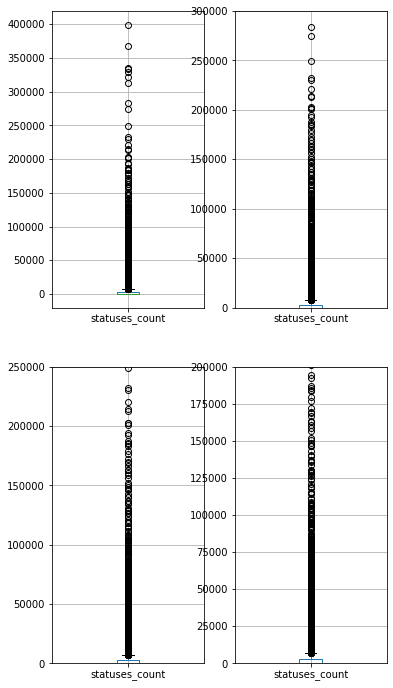

In [ ]:
fig = plt.figure()
fig.set_figheight(12)

plt.subplot(2, 2, 1)
box1 = users.boxplot(column=['statuses_count'])

plt.subplot(2, 2, 2)
box2 = users.boxplot(column=['statuses_count'])
plt.ylim(0, 3e5)

plt.subplot(2, 2, 3)
box3 = users.boxplot(column=['statuses_count'])
plt.ylim(0, 2.5e5)

plt.subplot(2, 2, 4)
box4 = users.boxplot(column=['statuses_count'])
plt.ylim(0, 2e5)  # possibile threshold: 1e4

plt.show()

In [ ]:
threshold=2e5

In [ ]:
outliers= users[users.statuses_count>threshold].statuses_count.count() # how many outliers> threshold?
percentage = round((outliers*100)/users.shape[0], 4) 
print('Number of outliers> threshold:', outliers)
print('Percentage of outliers> threshold:', percentage,'%')

Number of outliers> threshold: 18
Percentage of outliers> threshold: 0.1564 %


* Outliers management > substitution with threshold

In [ ]:
users['statuses_count']=users['statuses_count'].apply(lambda x: threshold if x >threshold else x)

* Statistics without outliers (substituted with threshold) 

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.statuses_count.describe() 

count    11109.00
mean      5764.06
std      17393.21
min          0.00
25%         41.00
50%         68.00
75%       2916.00
max     200000.00
Name: statuses_count, dtype: float64

In [ ]:
print('Mean:', round(np.mean(users.statuses_count),2))
print('St Dev:',round(np.std(users.statuses_count),2))
median= np.nanmedian(users.statuses_count)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(users.statuses_count, nan_policy='omit'),2))
mode= stats.mode(users.statuses_count, nan_policy='omit')[0][0]
print("Mode:", mode)

Mean: 5764.06
St Dev: 17392.42
Median: 68.0
MAD: 49.0
Mode: 43.0


* Sobstitution of NaN values with the most appropriate index

The median is used in place of NaN values since it is less susceptible to outliers and more indicative of the data in this situation.

In [ ]:
users.statuses_count.fillna(value=median, inplace=True)

In [ ]:
print("Number of statuses_count with NaN value:", users['statuses_count'].isnull().sum())

Number of statuses_count with NaN value: 0


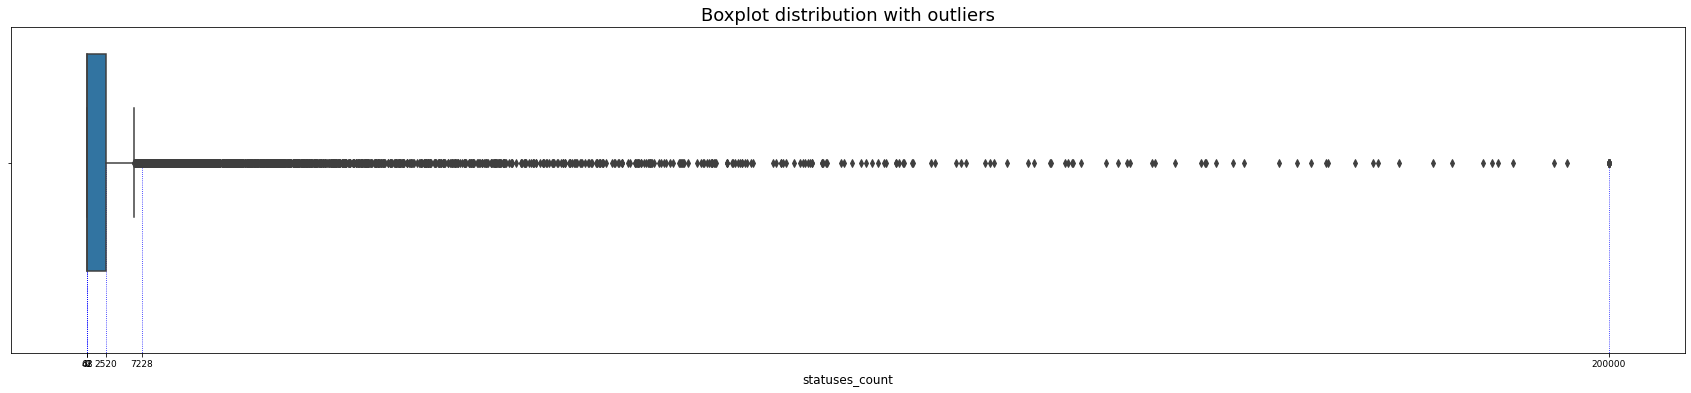

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='statuses_count', data=users)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(users.statuses_count, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("statuses_count", rotation = "horizontal", size = 12)
plt.show()

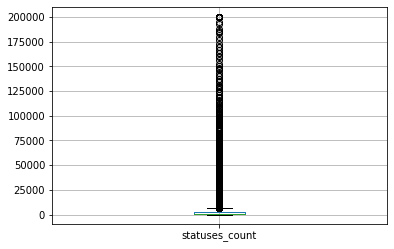

In [ ]:
users.boxplot(column=['statuses_count']) 

In [ ]:
users['statuses_count']=users['statuses_count'].astype(int)

## Saving cleaned dataset

In [ ]:
users.to_csv('/content/drive/Shareddrives/DataMining/dataset/clean_users.csv', index=False)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
users.describe(include="all", datetime_is_numeric=True)

,id,name,lang,bot,created_at,statuses_count
count,11508,11507,11508,11508,11508,11508.00
unique,11508,11360,21,2,NaN,NaN
top,2353593986,Sara,en,1,NaN,NaN
freq,1,7,9974,6116,NaN,NaN
mean,NaN,NaN,NaN,NaN,2017-10-03 21:23:16.013121280,5566.57
min,NaN,NaN,NaN,NaN,2012-01-24 01:57:38,0.00
25%,NaN,NaN,NaN,NaN,2017-01-18 09:50:16.500000,42.00
50%,NaN,NaN,NaN,NaN,2018-01-30 17:20:36,68.00
75%,NaN,NaN,NaN,NaN,2019-02-25 00:17:30,2520.25
max,NaN,NaN,NaN,NaN,2020-04-21 07:28:31,200000.00


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              11508 non-null  object        
 1   name            11507 non-null  object        
 2   lang            11508 non-null  object        
 3   bot             11508 non-null  object        
 4   created_at      11508 non-null  datetime64[ns]
 5   statuses_count  11508 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 887.4+ KB


## Correlations between numerical and categorical attributes

Considering that the only numerical attribute in the dataset *users* is **statuses_count**, it might be better to see links and correlations graphically through plots.

In [ ]:
users['lang'].value_counts()
users.groupby(['lang']).count()

,id,name,bot,created_at,statuses_count
lang,,,,,
ar,3,3,3,3,3
da,2,2,2,2,2
de,8,8,8,8,8
el,1,1,1,1,1
en,9974,9973,9974,9974,9974
en-au,1,1,1,1,1
en-gb,54,54,54,54,54
es,319,319,319,319,319
fr,36,36,36,36,36


In [ ]:
colorlist =  ['#ff0000', '#ff4000', '#ff8000', '#ffbf00', '#ffff00', '#bfff00', '#80ff00', '#40ff00', '#00ff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1']


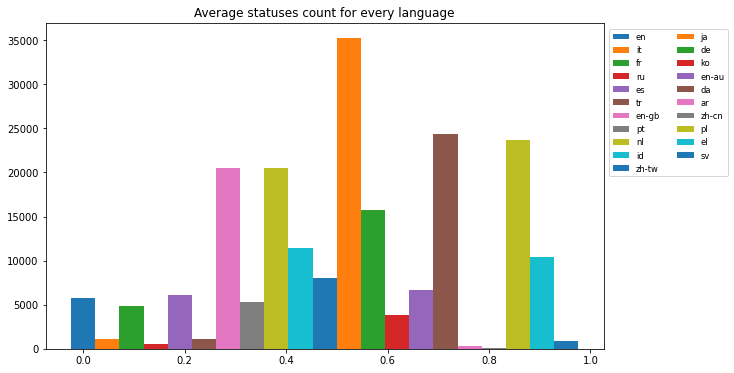

In [ ]:
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
langs = users.lang.unique()
for i in range(len(langs)):
  point = (1/len(langs) * i)
  axs.bar(point, users[users.lang == langs[i]].statuses_count.mean(),
          (1/len(langs)), label=langs[i])
  axs.legend(bbox_to_anchor=(1.01, 0.98), loc='upper left', borderaxespad=0., ncol=2, fontsize='small')
  axs.set_title('Average statuses count for every language')

#axs.set_xticks(langs)
#axs.tick_params(labelrotation=90) # rotazione nomi
plt.show()
#da aggiustare colori e labels sulla asse x

['en', 'it', 'es', 'pt', 'en-gb']


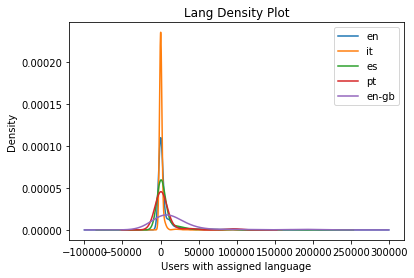

In [ ]:
#langs = users['lang'].unique()
lang_values = users['lang'].value_counts().index.tolist()[:5]
print(lang_values)
#print(langs)
for lang in lang_values:
      users.statuses_count[users.lang == lang].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
plt.title('Lang Density Plot')
plt.xlabel('Users with assigned language')

plt.legend((lang_values), loc='best')
plt.show()


['0', '1']


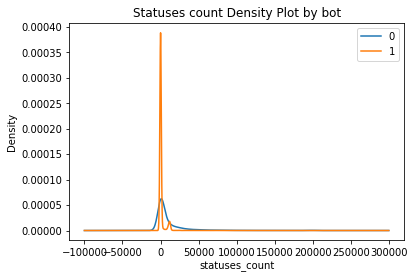

In [ ]:
bots = sorted(users['bot'].unique())
print(bots)
for bot in bots:
  users.statuses_count[users.bot == bot].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
plt.title('Statuses count Density Plot by bot')
plt.xlabel('statuses_count')

plt.legend(('0', '1'), loc='best')
plt.show()
#i bot tendono a pubblicare di meno

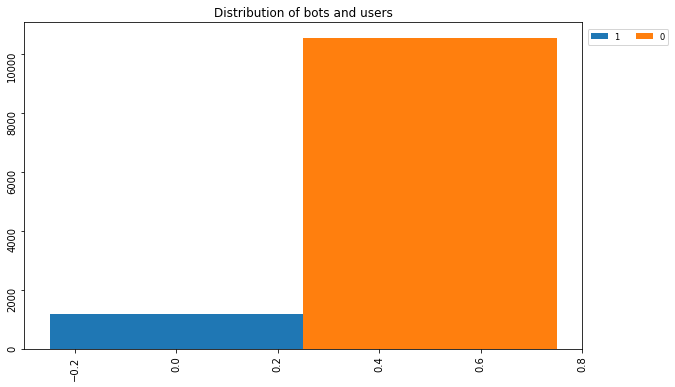

In [ ]:
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
bots = users.bot.unique()
for i in range(len(bots)):
  point = (1/len(bots) * i)
  axs.bar(point, users[users.bot == bots[i]].statuses_count.mean(),
          (1/len(bots)), label=bots[i])
  axs.legend(bbox_to_anchor=(1.01, 0.98), loc='upper left', borderaxespad=0., ncol=2, fontsize='small')
  axs.set_title('Distribution of bots and users')

#axs.set_xticks(langs)
axs.tick_params(labelrotation=90) # rotazione nomi
plt.show()
#da aggiustare colori e labels sulla asse x

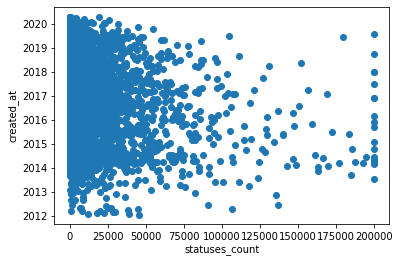

In [ ]:
#scatter plot
plt.scatter(users['statuses_count'], 
            users['created_at'])
plt.xlabel('statuses_count')
plt.ylabel('created_at')
plt.show()

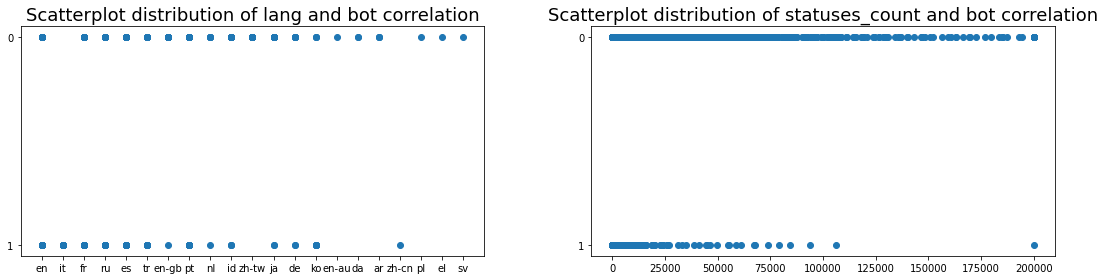

In [ ]:
plt.rcParams["figure.figsize"] = [16, 4]
plt.subplot(1, 2, 1)
#distribuzione e tendenze centrali: boxplot
scatter1 = plt.scatter(users['lang'], users['bot'])
plt.title("Scatterplot distribution of lang and bot correlation", size = 18)
#scatter1.set_xlabel("favorite_count", rotation = "horizontal", size = 16)
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(users['statuses_count'], users['bot'])
plt.title("Scatterplot distribution of statuses_count and bot correlation", size = 18)
#scatter2.set_xlabel("num_hashtags", rotation = "horizontal", size = 16)
plt.tight_layout()
plt.show()